In [41]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
#Preparing training data with top 10000 most frequently occured words.


In [42]:
#Converting the data into tensors as the integers can't be fed to neural network
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data) 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#print(x_train[0])

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
#Compiling the model with optimizers
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5267 - acc: 0.7957 - val_loss: 0.4079 - val_acc: 0.8605
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3224 - acc: 0.9009 - val_loss: 0.3188 - val_acc: 0.8829
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2362 - acc: 0.9243 - val_loss: 0.3106 - val_acc: 0.8766
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1872 - acc: 0.9406 - val_loss: 0.2730 - val_acc: 0.8911
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1519 - acc: 0.9513 - val_loss: 0.2907 - val_acc: 0.8840
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1268 - acc: 0.9595 - val_loss: 0.2903 - val_acc: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1069 - acc: 0.9671 - val_loss: 0.3276 - val_acc: 0.8798
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0895 - acc: 

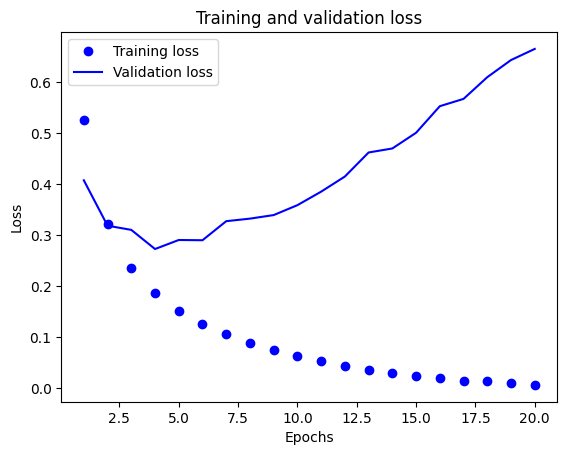

In [48]:
history_dict = history.history

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
#Retraining the data with 4 epochs instead of 20 as done previously
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4398 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1949 - accuracy: 0.9297
Epoch 4/4
782/782 [==============================] - 1s 591us/step - loss: 0.3007 - accuracy: 0.8804


In [51]:
#Evaluate and print results
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 664us/step - loss: 0.3007 - accuracy: 0.8804
[0.30068308115005493, 0.8804000020027161]


In [52]:
# Now using the model to predict the output on new unseen data 
model.predict(x_test)

782/782 [==============================] - 0s 522us/step


array([[0.24165912],
       [0.99996525],
       [0.8530361 ],
       ...,
       [0.12339387],
       [0.08535815],
       [0.7529926 ]], dtype=float32)